In [37]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np

cre_type="n"
sky_type="clh"

In [38]:
# open dataset
if cre_type=="n" and sky_type!="cldhgh_only" and sky_type!="clh":
    print("netcre")
    if sky_type=="allsky":
        print("allsky")
        ds = xr.open_mfdataset(
            ["/scratch/b/b380883/"+
            f"global1deg_lcre_monthlymean_20200130.nc", 
            "/scratch/b/b380883/"+
            f"global1deg_scre_monthlymean_20200130.nc"]
            )
    elif sky_type=="cldhgh":
        print("cldhgh")
        ds = xr.open_mfdataset(
            "/scratch/b/b380883/"+
            f"global1deg_cldhgh_*cre_monthlymean_20200130.nc"
            )
    ds = ds.rst.isel(time=0).values - ds.rlt.isel(time=0) # rlt output is negative

elif sky_type=="allsky":
    print("allsky")
    ds = xr.open_dataset(
        "/scratch/b/b380883/"+
        f"global1deg_{cre_type}cre_monthlymean_20200130.nc"
        ).isel(time=0)
        
elif sky_type=="cldhgh":
    print("ice clouds only - cldhgh")
    if cre_type=="l" or cre_type=="s":
        print(f"{cre_type}w cre")
        ds = xr.open_dataset(
            "/scratch/b/b380883/"+
            f"global1deg_cldhgh_{cre_type}cre_monthlymean_20200130.nc"
            ).mean(dim=['time'])
    elif cre_type=="net_clh":
        print("net clh = cre all sky * clh")
        ds_lw = xr.open_dataset(
                "/scratch/b/b380883/"+
                f"global1deg_lcre_monthlymean_20200130.nc"
                ).isel(time=0).rlt
        ds_sw = xr.open_dataset(
                "/scratch/b/b380883/"+
                f"global1deg_scre_monthlymean_20200130.nc"
                ).isel(time=0).rst
        ds_hc = xr.open_dataset(
                "/scratch/b/b380883/"+
                "global1deg_clh_monthlymean_20200130.nc"
                ).isel(time=0).clh
        ds = (ds_sw-ds_lw)*ds_hc
    elif cre_type=="net_cldhgh":
        print("net clh = cre clh * clh")
        ds_lw = xr.open_dataset(
                "/scratch/b/b380883/"+
                f"global1deg_cldhgh_lcre_monthlymean_20200130.nc"
                ).isel(time=0).rlt
        ds_sw = xr.open_dataset(
                "/scratch/b/b380883/"+
                f"global1deg_cldhgh_scre_monthlymean_20200130.nc"
                ).isel(time=0).rst
        ds_hc = xr.open_dataset(
                "/scratch/b/b380883/"+
                "global1deg_clh_monthlymean_20200130.nc"
                ).isel(time=0).clh
        ds = (ds_sw-ds_lw)*ds_hc

elif sky_type=="clh":
    print("allsky * clh = cldhgh cre")
    if cre_type=="n":
        print("net cre = lw + sw")
        lw = -xr.open_dataset(
            "/scratch/b/b380883/"+
            "global1deg_lcre_monthlymean_20200130.nc"
            ).isel(time=0)["rlt"]
        sw = xr.open_dataset(
            "/scratch/b/b380883/"+
            "global1deg_scre_monthlymean_20200130.nc"
            ).isel(time=0)["rst"]
        ds = sw + lw.values
    else:
        print(cre_type+"w cre * clh")
        ds = xr.open_dataset(
            "/scratch/b/b380883/"+
            f"global1deg_{cre_type}cre_monthlymean_20200130.nc"
            ).isel(time=0)[f"r{cre_type}t"]
    clh = xr.open_dataset(
        "/scratch/b/b380883/"+
        "global1deg_clh_monthlymean_20200130.nc"
        ).isel(time=0).clh
    ds = ds*clh.values

elif sky_type=="cldhgh_only":
    print("high cloud only")
    if cre_type=="l" or cre_type=="s":
        ds = xr.open_dataset(
             "/scratch/b/b380883/"+
             f"global1deg_cldhgh_only_cldhgh_{cre_type}cre_monthlymean_20200130.nc"
        ).isel(time=0)
    elif cre_type=="n":
        sw = xr.open_dataset(
             "/scratch/b/b380883/"+
             "global1deg_cldhgh_only_cldhgh_scre_monthlymean_20200130.nc"
        ).isel(time=0).rst
        lw = xr.open_dataset(
             "/scratch/b/b380883/"+
             "global1deg_cldhgh_only_cldhgh_lcre_monthlymean_20200130.nc"
        ).isel(time=0).rlt
        ds = sw-lw

else:
    print("custom")
    ds = xr.open_mfdataset(
        "/scratch/b/b380883/"+
        # "global1deg_qvi_monthlymean_20200130.nc"
        "global1deg_clh_monthlymean_20200130.nc"
        # "global1deg_cldhgh_only_cldhgh_scre_rst_daily*.nc"
        # "global1deg_cldhgh_only_clh_monthlymean_20200130.nc"
        # "global1deg_cldhgh_only_clh_15min_SCREAM-3km_DW-ATM_r1i1p1f1_2d_gn_20200130000000-20200130234500.nc"
        ).mean(dim=['time']).clh

ds

allsky * clh = cldhgh cre
net cre = lw + sw


<xarray.DataArray 'rst' (lat: 180, lon: 360)>
array([[-0.2890377 , -0.28864512, -0.28867814, ..., -0.29137897,
        -0.2894806 , -0.2894486 ],
       [-0.2047671 , -0.2061717 , -0.20094295, ..., -0.1860148 ,
        -0.19046062, -0.20381095],
       [-0.11668491, -0.11403415, -0.11621331, ..., -0.11304515,
        -0.11631792, -0.11759616],
       ...,
       [ 1.3380275 ,  1.3524947 ,  1.3669091 , ...,  1.2938257 ,
         1.3063402 ,  1.3223957 ],
       [ 1.1211951 ,  1.1253597 ,  1.1311487 , ...,  1.1055144 ,
         1.1110837 ,  1.116931  ],
       [ 0.9545897 ,  0.9589959 ,  0.95889795, ...,  0.9453436 ,
         0.9500197 ,  0.9501226 ]], dtype=float32)
Coordinates:
    time     object 2020-02-13 23:52:30
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

saved as plots/global/ncre_clh_monthlymean.png


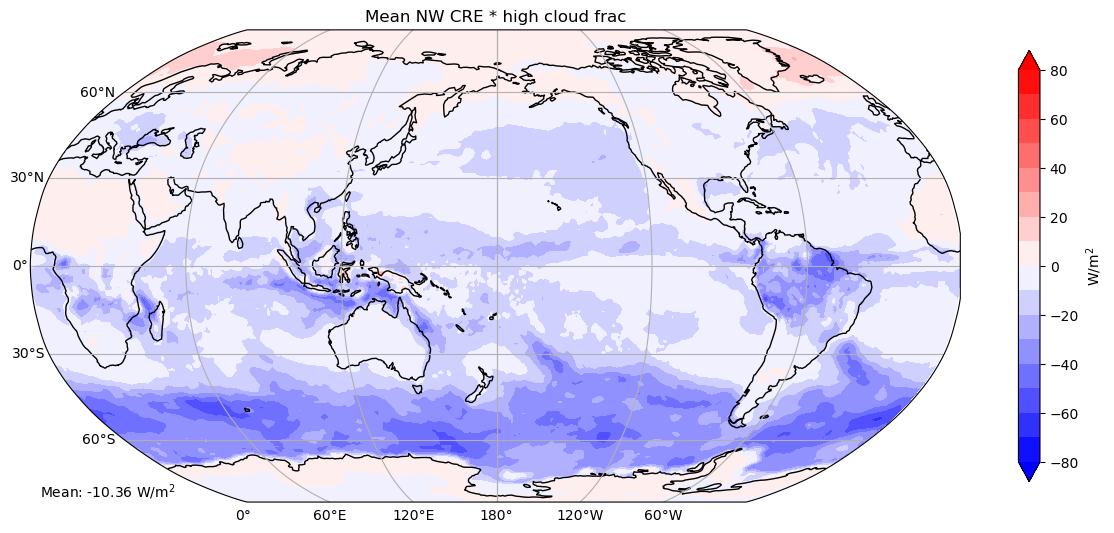

In [39]:
fig = plt.figure(figsize=(15,7))

ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))

if cre_type=="s":
    im = ax.contourf(ds.lon, ds.lat, ds, transform=ccrs.PlateCarree(),
                     cmap="Blues_r", extend="min" , levels=np.arange(-80,0,10))
    ax.annotate(f"Mean: {ds.mean().values:0.2f} W/m$^2$", (0.01,0.01), xycoords="axes fraction")
elif cre_type=="l":
    im = ax.contourf(ds.lon, ds.lat, -ds, transform=ccrs.PlateCarree(),
                     cmap="Reds", extend="max" , levels=np.arange(10,81,10))
    ax.annotate(f"Mean: {-ds.mean().values:0.2f} W/m$^2$", (0.01,0.01), xycoords="axes fraction")
else:
    im = ax.contourf(ds.lon, ds.lat, ds, transform=ccrs.PlateCarree(),
                     cmap="bwr", extend="both" , levels=np.arange(-80,81,10))
                     # cmap="gist_earth_r", extend="max", levels=20)
                     # cmap="BuPu", levels=np.linspace(0,1,11))
    ax.annotate(f"Mean: {ds.mean().values:0.2f} W/m$^2$", (0.01,0.01), xycoords="axes fraction")
ax.coastlines()
plt.colorbar(im, ax=ax, shrink=0.8, label="W/m$^2$")

gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
if sky_type=="allsky":
    ax.set_title(f"Mean {cre_type.upper()}W CRE - all sky")
elif sky_type=="cldhgh":
    ax.set_title(f"Mean {cre_type.upper()}W CRE - ice clouds (cldhgh)")
elif sky_type=="clh":
    ax.set_title(f"Mean {cre_type.upper()}W CRE * high cloud frac")
else:
    ax.set_title(f"Mean {sky_type}")

savename=f"plots/global/{cre_type}cre_{sky_type}_monthlymean.png"
print("saved as",savename)
plt.savefig(savename, dpi=150, bbox_inches="tight", pad_inches=0.1)
plt.show()
